Downloading S&P500 Price Data

In [7]:
# Call Yahoo Finance API to download daily stock and index prices
import yfinance as yf
import matplotlib
import pandas as pd
import os

In [8]:
# Downlad price history for a single symbol with .Ticker
nasdaq = yf.Ticker("^IXIC")

In [9]:
# Query Historical Prices
nasdaq = nasdaq.history(period="max")

In [10]:
nasdaq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,0.0,0.0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,0.0,0.0
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,0.0,0.0


In [11]:
nasdaq.index

DatetimeIndex(['1971-02-05 00:00:00-05:00', '1971-02-08 00:00:00-05:00',
               '1971-02-09 00:00:00-05:00', '1971-02-10 00:00:00-05:00',
               '1971-02-11 00:00:00-05:00', '1971-02-12 00:00:00-05:00',
               '1971-02-16 00:00:00-05:00', '1971-02-17 00:00:00-05:00',
               '1971-02-18 00:00:00-05:00', '1971-02-19 00:00:00-05:00',
               ...
               '2025-06-11 00:00:00-04:00', '2025-06-12 00:00:00-04:00',
               '2025-06-13 00:00:00-04:00', '2025-06-16 00:00:00-04:00',
               '2025-06-17 00:00:00-04:00', '2025-06-18 00:00:00-04:00',
               '2025-06-20 00:00:00-04:00', '2025-06-23 00:00:00-04:00',
               '2025-06-24 00:00:00-04:00', '2025-06-25 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=13712, freq=None)

#### Cleaning and Visualizing NASDAQ Data

<Axes: xlabel='Date'>

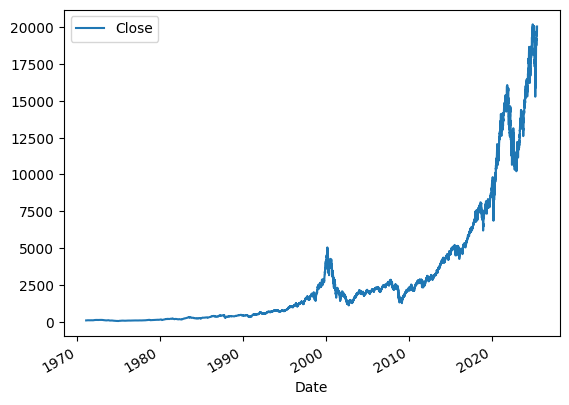

In [ ]:
# Plot trend of data using DateTime index
nasdaq.plot.line(y="Close", use_index=True)